In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

df = pd.read_csv('../data_samples/data_jobs.csv')

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']).dt.normalize()

def take_list(str_list):
    if pd.notna(str_list):
        return literal_eval(str_list)
    return str_list

df['job_skills'] = df['job_skills'].apply(take_list)

df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [48]:
# Filter the city you want For Data Analysis
df_city = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].reset_index(drop=True)

Text(0.5, 0, 'Number of Jobs')

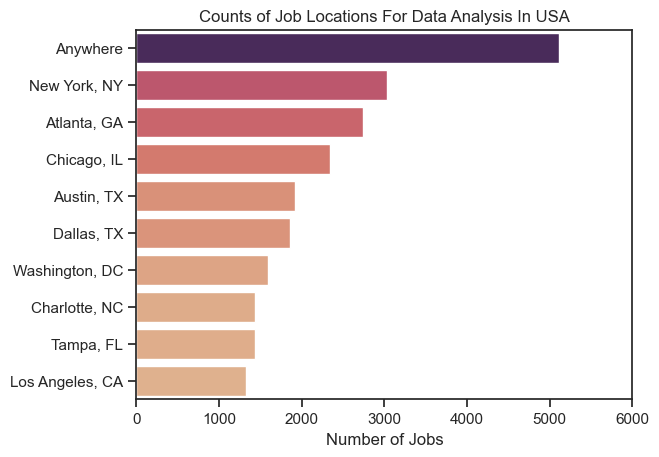

In [70]:
# Analyze the states
df_plot = df_city['job_location'].value_counts().to_frame('count').head(10)

sns.set_theme(style='ticks')

ax = sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='flare', legend=False)
ax.set_xlim(0, 6000)
ax.set_title('Counts of Job Locations For Data Analysis In USA')
ax.set_ylabel('')
ax.set_xlabel('Number of Jobs')

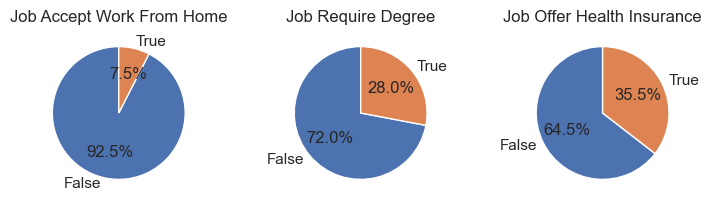

In [55]:
# Analyze some attributes

fig, axs = plt.subplots(1, 3, figsize=(7, 5))

jobs = {
    'job_work_from_home': 'Job Accept Work From Home',
    'job_no_degree_mention': 'Job Require Degree',
    'job_health_insurance': 'Job Offer Health Insurance'
}


for i, (key, title) in enumerate(jobs.items()):
    df_city[key].value_counts().to_frame() \
    .plot(kind='pie', y='count', autopct='%1.1f%%', ax=axs[i], legend=False, startangle=90)
    axs[i].set_ylabel('')
    axs[i].set_title(title)

fig.tight_layout(w_pad=3)
# ax.set_title('Job Accepet work from home')
# ax.set_ylabel('')


Text(0.5, 1.0, 'Counts of Companies For Data Analysis In USA')

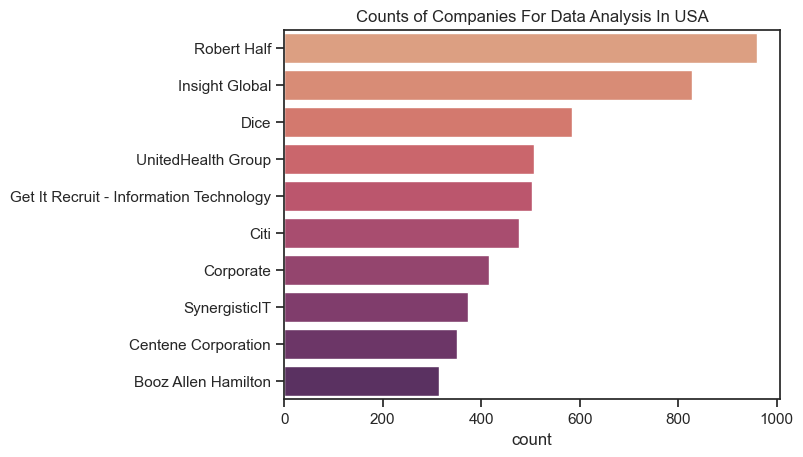

In [71]:
# What are the companies in our study ?
df_plot = df_city['company_name'].value_counts().head(10).to_frame()

ax = sns.barplot(data=df_plot, x='count', y='company_name', hue='company_name', palette='flare')
ax.set_ylabel('')
ax.set_title('Counts of Companies For Data Analysis In USA')
